https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/archive.zip', compression = 'zip', index_col=0)
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

так как хотим анализировать популярность треков через 

популярность в зависимости от клипа, популярность альбома и сингла, попуярность треков в зависимости от характеристик

In [5]:
df.shape

(20718, 27)

In [6]:
df.Stream.describe()

count    2.014200e+04
mean     1.359422e+08
std      2.441321e+08
min      6.574000e+03
25%      1.767486e+07
50%      4.968298e+07
75%      1.383581e+08
max      3.386520e+09
Name: Stream, dtype: float64

<Axes: >

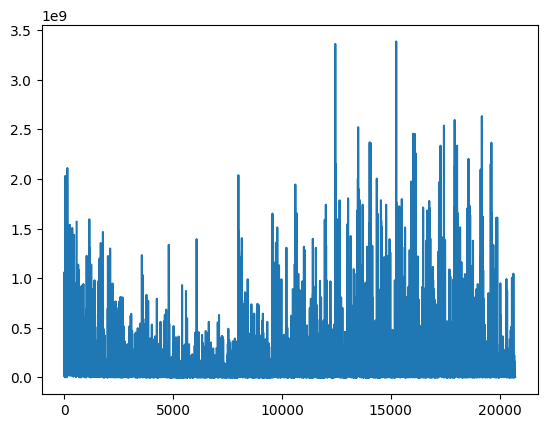

In [7]:
df.Stream.plot()

<ipython-input-8-35124f1d6cdc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Stream)


<Axes: xlabel='Stream', ylabel='Density'>

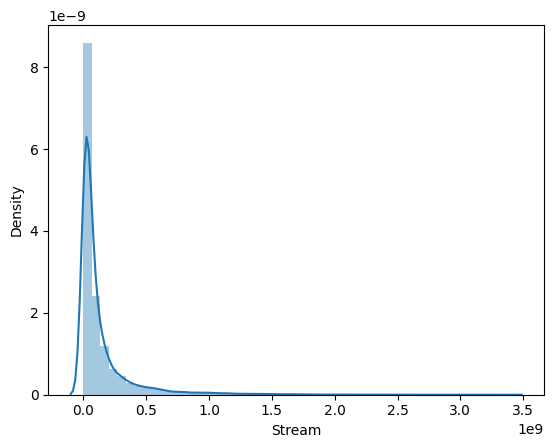

In [8]:
sns.distplot(df.Stream)

In [9]:
df.dropna(subset='Stream', inplace=True)

<Axes: >

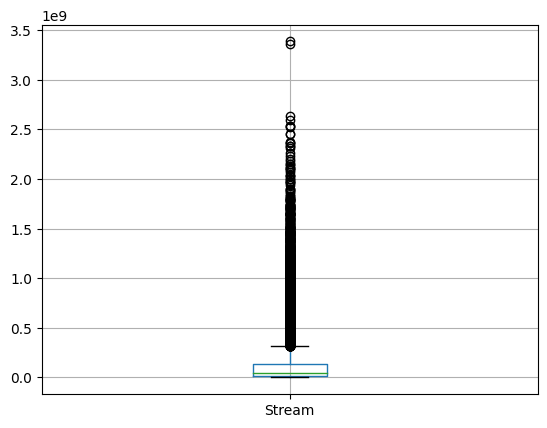

In [10]:
df[['Stream']].boxplot()

Будем считать популярными треками те, которые находятся за 75 квантилем

In [11]:
df.Stream.quantile(q=0.75)

138358065.25

Посмотрим еще популярность на ютубе

по просмотрам

<Axes: >

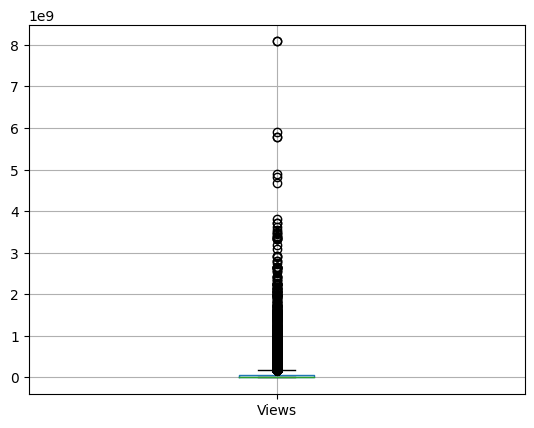

In [12]:
df[['Views']].boxplot()

In [13]:
df.Track.duplicated().sum()

2813

In [14]:
popular_df = df[['Stream',
                'Danceability',
                'Energy',
                'Key',
                'Loudness',
                'Speechiness',
                'Acousticness',
                'Instrumentalness',
                'Liveness','Valence',
                'Tempo',
                'Duration_ms']]\
                .query('Stream > 138358065')
popular_df.head()

,Stream,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,1.040235e+09,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0
1,3.100837e+08,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0
3,4.346636e+08,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0
4,6.172597e+08,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0
5,3.238503e+08,0.760,0.891,11.0,-5.852,0.0372,0.022900,0.086900,0.2980,0.966,120.264,245000.0


для начала посмотрим на вариативность характеристик треков

In [15]:
popular_df.describe()

,Stream,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
count,5.036000e+03,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000
mean,4.192057e+08,0.639721,0.657201,5.219265,-6.604226,0.092679,0.233122,0.021289,0.182752,0.524053,121.387449,222450.079841
std,3.571914e+08,0.155326,0.184393,3.605715,3.001683,0.092222,0.249782,0.108353,0.150223,0.232158,29.315159,55963.986800
min,1.383608e+08,0.000000,0.001890,0.000000,-31.544000,0.000000,0.000005,0.000000,0.019000,0.000000,0.000000,58149.000000
25%,1.883513e+08,0.541000,0.540000,2.000000,-7.827500,0.036600,0.029950,0.000000,0.092500,0.342000,97.986000,188140.500000
50%,2.864477e+08,0.658000,0.677000,5.000000,-5.980000,0.052900,0.138000,0.000000,0.122000,0.523000,119.992000,215760.000000
75%,5.033518e+08,0.754000,0.796000,8.000000,-4.595000,0.105000,0.366500,0.000116,0.223000,0.709000,139.994000,247624.000000
max,3.386520e+09,0.975000,0.996000,11.000000,0.175000,0.818000,0.996000,1.000000,0.977000,0.985000,220.099000,611077.000000


In [16]:
clear_df = df[['Stream',
                'Danceability',
                'Energy',
                'Key',
                'Loudness',
                'Speechiness',
                'Acousticness',
                'Instrumentalness',
                'Liveness','Valence',
                'Tempo',
                'Duration_ms']]
clear_df.describe()

,Stream,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
count,2.014200e+04,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,2.014000e+04
mean,1.359422e+08,0.620460,0.635153,5.290318,-7.644976,0.095312,0.291900,0.055457,0.192971,0.529521,120.628974,2.244368e+05
std,2.441321e+08,0.165506,0.214007,3.577017,4.633981,0.106977,0.286446,0.192882,0.167876,0.245295,29.601307,1.258144e+05
min,6.574000e+03,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04
25%,1.767486e+07,0.519000,0.507000,2.000000,-8.794000,0.035700,0.045400,0.000000,0.094175,0.339000,96.994000,1.799145e+05
50%,4.968298e+07,0.638000,0.666000,5.000000,-6.515000,0.050600,0.194000,0.000002,0.125000,0.537000,119.965000,2.131850e+05
75%,1.383581e+08,0.741250,0.798000,8.000000,-4.922000,0.104000,0.477000,0.000427,0.236000,0.726000,139.952250,2.520000e+05
max,3.386520e+09,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06


<ipython-input-39-fa3f8344fb71>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clear_df['Speechiness'], hist=True, kde=False,


<Axes: xlabel='Speechiness'>

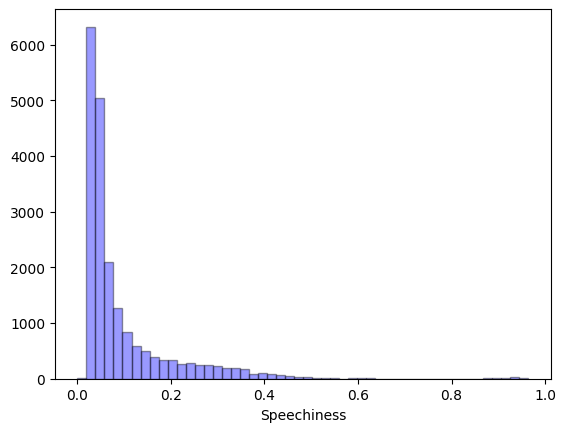

In [39]:
sns.distplot(clear_df['Speechiness'], hist=True, kde=False, 
              color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-40-df7a340a2450>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_df['Speechiness'], hist=True, kde=False,


<Axes: xlabel='Speechiness'>

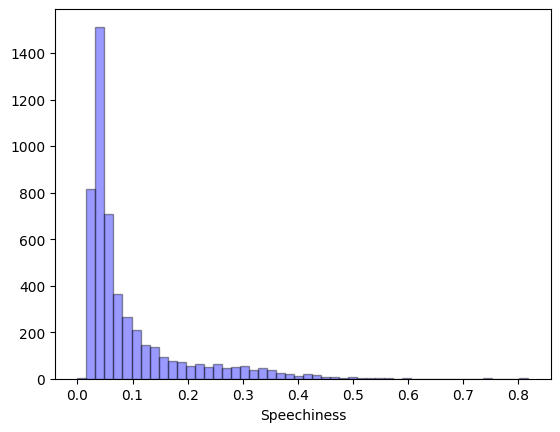

In [40]:
sns.distplot(popular_df['Speechiness'], hist=True, kde=False, 
              color = 'blue',
             hist_kws={'edgecolor':'black'})

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Создание модели линейной регрессии
model = LinearRegression()

# Загрузка данных
X = np.array([clear_df.Valence, clear_df.Tempo])  # независимые переменные
y = np.array(clear_df.Stream)  # зависимая переменная
 # Выделение тренировочной и тестовой выборки 
from sklearn.model_selection import train_test_split  
 
X_train, X_test, y_train, y_test = train_test_split( 
                 X, y, test_size=0.3, random_state=0)
# Обучение модели
model.fit(X_train, y_train)

# Вывод коэффициентов регрессии
print('Intercept:', model.intercept_)  # свободный член
print('Coefficients:', model.coef_)  # коэффициенты регрессии

# Прогнозирование значения зависимой переменной для новых данных
new_X = np.array([[10, 11, 12], [13, 14, 15]])
predicted_y = model.predict(X_test)
print('Predicted values:', predicted_y)


Intercept: 9.333333333333334
Coefficients: [0.11111111 0.11111111 0.11111111]
Predicted values: [13. 14.]
